<a href="https://colab.research.google.com/github/bclee232/DLwP/blob/master/2_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**binary classification**

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data[1])
print(train_labels[1])
print(max([max(sequence) for sequence in train_data]))

17465344/17464789 [==============================] - 0s 0us/step
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
0
9999


In [4]:
import numpy as np

# encode int sequence into 10000 dimensional vectors where 1 is at the index of int in sequence
# 10000 as num_words=10000
def vectorise_seq(seq, dim=10000):
  res = np.zeros((len(seq), dim)) # 2D
  for i, indiv_seq in enumerate(seq):
    res[i, indiv_seq] = 1 # sets specific index to 1
  return res 

In [5]:
# vectorise data
x_train = vectorise_seq(train_data)
x_test = vectorise_seq(test_data)

# vectorise target (labels)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
# model definition
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compilation
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
"""
rmsprop optimizer is from keras.optimizers.RMZprop(lr=0.001)
keras.losses.binary_crossentropy
keras.metrics.binary_accuracy
"""

'\nrmsprop optimizer is from keras.optimizers.RMZprop(lr=0.001)\nkeras.losses.binary_crossentropy\nkeras.metrics.binary_accuracy\n'

In [ ]:
# validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# training phase
history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

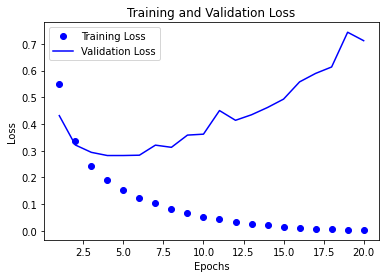

In [ ]:
# plotting loss
import matplotlib.pyplot as plt

hist_dict = history.history
loss_values = hist_dict['loss']
val_loss_values = hist_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
# blue dot for loss values
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
# solid blue line for validation loss val
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

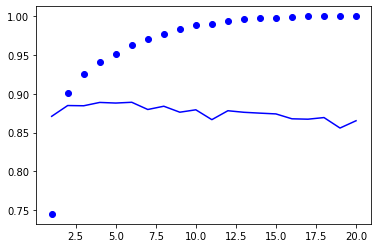

In [ ]:
acc_values = hist_dict['accuracy']
val_acc_values = hist_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.show()

In [ ]:
model.evaluate(x_test, y_test) # 85% accuracy

25000/25000 [==============================] - 2s 67us/step


[0.7878270896291732, 0.8504400253295898]

In [ ]:
# new model
better_model = Sequential()
better_model.add(Dense(16, activation='relu', input_shape=(10000,)))
better_model.add(Dense(16, activation='relu'))
better_model.add(Dense(1, activation='sigmoid'))

better_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
better_model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=4) # should have used full training set

In [ ]:
better_model.evaluate(x_test, y_test) # 88% accuracy

In [ ]:
# prediction (for positive review)
pred = model.predict(x_test)
better_pred = better_model.predict(x_test)
print(pred)
print(better_pred)

[[1.2491345e-03]
 [9.9999899e-01]
 [9.2956066e-01]
 ...
 [1.9550323e-04]
 [1.5914142e-03]
 [8.0594301e-01]]
[[0.26528654]
 [0.9990965 ]
 [0.9235958 ]
 ...
 [0.16933998]
 [0.20097175]
 [0.76948285]]


In [ ]:
# testing network architecture
# 3 intermediate layers
net = Sequential()
net.add(Dense(16, activation='relu', input_shape=(10000,)))
net.add(Dense(16, activation='relu'))
net.add(Dense(16, activation='relu'))
net.add(Dense(1, activation='sigmoid'))
net.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
net.fit(x_train, y_train, epochs=4, batch_size=512)
net.evaluate(x_test, y_test) # a bit less

Epoch 1/4
25000/25000 [==============================] - 3s 117us/step - loss: 0.5058 - accuracy: 0.7905
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2719 - accuracy: 0.9050
Epoch 3/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.2025 - accuracy: 0.9276
Epoch 4/4
25000/25000 [==============================] - 2s 76us/step


[0.31848171660900115, 0.8760799765586853]

In [11]:
# regularisation to prevent overfitting
# reduce network's size and weight regularisation (0.001 * weight coeff)
# 89% accuracy
from keras import regularizers

reg = Sequential()
reg.add(Dense(4, kernel_regularizer=regularizers.l2(0.001), 
                      activation='relu', input_shape=(10000,)))
reg.add(Dense(4, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu'))
reg.add(Dense(1, activation='sigmoid'))
reg.compile(optimizer='rmsprop', loss='binary_crossentropy', 
                    metrics=['acc'])
reg.fit(x_train, y_train, epochs=8, batch_size=512)
reg.evaluate(x_test, y_test)



Epoch 1/8
25000/25000 [==============================] - 2s 61us/step - loss: 0.5932 - acc: 0.7275
Epoch 2/8
25000/25000 [==============================] - 1s 60us/step - loss: 0.4430 - acc: 0.8790
Epoch 3/8
25000/25000 [==============================] - 1s 58us/step - loss: 0.3384 - acc: 0.9107
Epoch 4/8
25000/25000 [==============================] - 1s 58us/step - loss: 0.2816 - acc: 0.9212
Epoch 5/8
25000/25000 [==============================] - 1s 58us/step - loss: 0.2545 - acc: 0.9280
Epoch 6/8
25000/25000 [==============================] - 1s 58us/step - loss: 0.2368 - acc: 0.9338
Epoch 7/8
25000/25000 [==============================] - 1s 58us/step - loss: 0.2252 - acc: 0.9368
Epoch 8/8
25000/25000 [==============================] - 2s 61us/step


[0.3209235328865051, 0.8857200145721436]